In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.1.0


In [8]:
import os
print('train apple scab images:', len(os.listdir(os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir2/train/Apple___Apple_scab/'))))
print('train apple black rot images:', len(os.listdir(os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir2/train/Apple___Black_rot'))))
print('train grape black rot images:', len(os.listdir(os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir2/train/Grape___Black_rot'))))
print('train grape esca images:', len(os.listdir(os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir2/train/Grape___Esca_(Black_Measles)'))))
print('train grape leaf blight images:', len(os.listdir(os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir2/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'))))
print('train potato early blight images:', len(os.listdir(os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir2/train/Potato___Early_blight'))))
print('train potato late blight images:', len(os.listdir(os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir2/train/Potato___Late_blight'))))
print('train tomato bacterial spot images:', len(os.listdir(os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir2/train/Tomato___Bacterial_spot'))))
print('train tomato leaf spot images:', len(os.listdir(os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir2/train/Tomato___Septoria_leaf_spot'))))
print('train tomato target spot images:', len(os.listdir(os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir2/train/Tomato___Target_Spot'))))

train apple scab images: 500
train apple black rot images: 500
train grape black rot images: 500
train grape esca images: 500
train grape leaf blight images: 500
train potato early blight images: 500
train potato late blight images: 500
train tomato bacterial spot images: 500
train tomato leaf spot images: 500
train tomato target spot images: 500


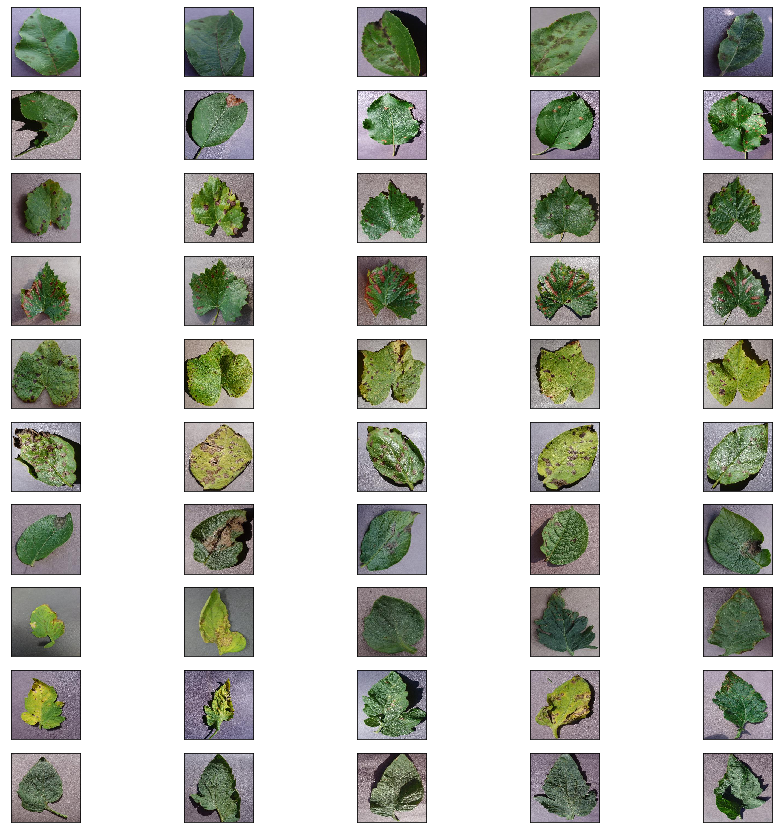

In [13]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
%matplotlib inline

files = [[path+f for f in os.listdir(path)[:5]] for path in [f'/content/drive/My Drive/Dataset/plantdisease-tugasakhir2/train/{x}/' for x in ['Apple___Apple_scab', 'Apple___Black_rot', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Early_blight', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot']]]

fig, axs = plt.subplots(10, 5, figsize=(15, 15), subplot_kw={'xticks': [], 'yticks': []})

for ax, img in zip(axs.flatten(), [item for sublist in files for item in sublist]):
    ax.imshow(load_img(img))

In [0]:
train_dir = os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir2/train')
val_dir = os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir2/validation')

In [26]:
image_size = 224 # Semua gambar diubah kedalam 224 * 224
batch_size = 50

# ubah semua kode gambar dari 0-255 menjadi 0-1 (berfungsi untuk standarisasi dari data)
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255,
                # featurewise_center=True,
                # featurewise_std_normalization=True,
                # rotation_range=20,
                # width_shift_range=0.2,
                # height_shift_range=0.2,
                # horizontal_flip=True)
             
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

#test_datagen = keras.preprocessing.image.ImageDataGenerator(
#                rescale=1./255)

# Generate data gambar menjadi array
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='sparse')

validation_generator = validation_datagen.flow_from_directory(
                val_dir, 
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='sparse')


#test_generator = test_datagen.flow_from_directory(
#                test_dir, 
#                target_size=(image_size, image_size),
#                batch_size=batch_size,
#                shuffle=False, #mempermudah saat nanti klasifikasi mengunakan sklearn
#                class_mode='sparse')

Found 5000 images belonging to 10 classes.
Found 1250 images belonging to 10 classes.


In [0]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
%matplotlib inline

img_samples = 16

image_dir = '/content/preview/'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

img = load_img('/content/drive/My Drive/Dataset/plantdisease-tugasakhir2/train/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

from itertools import islice
list(islice(train_datagen.flow(x, batch_size=1, save_to_dir='/content/preview', save_prefix='cat', save_format='jpeg'), img_samples));

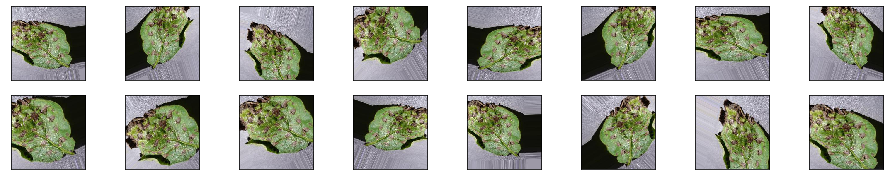

In [18]:
rows, cols = 2, img_samples // 2
fig, axs = plt.subplots(rows, cols, figsize=(16,3), subplot_kw={'xticks': [], 'yticks': []})

#for i, img in enumerate(os.listdir(image_dir)[:img_samples]):
#    axs[i//cols][i%cols].imshow(load_img(image_dir+img))

for ax, img in zip(axs.flatten(), os.listdir('/content/preview')[:img_samples]):
    ax.imshow(load_img('/content/preview/'+img))

In [0]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, BatchNormalization, Dropout

model = Sequential()
model.add(ResNet50(include_top = False, pooling ='avg', weights ='imagenet', input_shape=(image_size, image_size, 3)))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'softmax'))

model.layers[0].trainable = False

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
batch_normalization_3 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               524544    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)              

In [0]:
from tensorflow.python.keras import optimizers

#sgd = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [0]:
# Early stopping & checkpointing the best model in ../working dir & restoring that as our model for prediction
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 3)
cb_checkpointer = ModelCheckpoint(filepath = '/content/drive/My Drive/Dataset/best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [53]:
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

fit_history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs = 5,
        shuffle = True,
        validation_data = validation_generator, 
        callbacks=[cb_checkpointer, cb_early_stopper]
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 25 steps
Epoch 1/5
100/100 [==============================] - 68s 682ms/step - loss: 1.2178 - accuracy: 0.6168 - val_loss: 2.5593 - val_accuracy: 0.1000
Epoch 2/5
100/100 [==============================] - 64s 641ms/step - loss: 0.4374 - accuracy: 0.8782 - val_loss: 2.9029 - val_accuracy: 0.1000
Epoch 3/5
 10/100 [==>...........................] - ETA: 54s - loss: 0.3623 - accuracy: 0.8844WARNING:tensorflow:Can save best model only with val_loss available, skipping.


KeyboardInterrupt: ignored